In [1]:
import numpy as np
import matplotlib 
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
class plot_func():
    def __init__(self, data, clr, name):
        fig = plt.figure(1)
        ax = fig.add_subplot(111)
        ax.plot(range(1,len(data)+1),data,color=clr,label=name)
        ax.legend(loc='upper left')
        #ax.set_xbound(-1,10)
        #ax.set_ybound(1,100)
        ax.set_xlabel('Number of elements')
        ax.set_ylabel('Value')


In [3]:
def make_zeroes(n):
    m = []
    for i in iter(n):
        m.append(0)
    return m


In [4]:
def add_anomaly(num,x):
    t_num = make_zeroes(num)
    num.sort()
    #mean = np.mean(num)
    mu = len(num)/2 
    last_idx = len(num)
    delta = 1.0 + (x/100)
    for j in range(0,len(num)):
        increment = num[mu] * delta
        if j == mu:
            t_num[j] = increment
        else:
            increment_new = increment - num[mu]
            share = abs(mu - j)
            t_num[j] = num[j] + increment_new * (1.0 - (float(share)/float(mu)))
    return t_num  
            
            

In [5]:
def add_anomaly_exp(num):
    t_num = make_zeroes(num)
    num.sort()
    mu = len(num)/2
    print mu
    last_idx = len(num) - 1
    #print last_idx
    for j in range(0,len(num)):
        if j <= mu:
            #print j
            t_num[j] = num[j] * math.exp(float(j)/float(mu)) - j * (float(num[j])/float(mu))
            #t_num[j] = num[j] * (num[mu] ** j)
        else:
            k = last_idx - j
            #t_num[j] = num[j] * (num[mu] ** k)
            t_num[j] = num[j] * math.exp(float(k)/float(mu)) - k * (float(num[j])/float(mu))
    return t_num  

In [6]:
def add_anomaly_dynamically(num,x,count,mid_pos):
    t_num = list(num)
    if (mid_pos + count >= len(t_num)) and (mid_pos - count < 0):
        print "Point of injection is not suitable for injecting anomalies"
    else:
        t_num.sort()
        last_idx = len(t_num)
        delta = 1.0 + (x/100)
        new_list_test = [t_num[mid_pos]]
        for j in range(0,count):
            a = mid_pos - j
            b = mid_pos + j
            new_list_test.append(t_num[a])
            new_list_test.append(t_num[b])
            new_list_test.sort()
        mu = len(new_list_test)/2 
        increment = new_list_test[mu] * delta
        
        for k in range(mid_pos-count,mid_pos+count+1):
            if k == mid_pos:
                t_num[k] = increment
            else:
                increment_new = increment - new_list_test[mu]
                share = abs(mid_pos - k )
                t_num[k] = t_num[k] + increment_new * (1.0 - (float(share)/float(mu)))
    return t_num 

In [7]:
sample_data = [100] * 9
sample_random_data = [952, 335, 216, 912, 732, 777, 139, 176, 215, 99, 480]
anomaly_data = add_anomaly(sample_random_data,300.0)
anomaly1_data = add_anomaly(sample_data,10.0)
anomaly2_data = add_anomaly_exp(sample_data)
anomaly3_data = add_anomaly_exp(sample_random_data)
anomaly4_data = add_anomaly_dynamically(sample_data,40.0, 3, 5)
anomaly5_data = add_anomaly_dynamically(sample_random_data, 40.0, 3, 5)

4
5


In [8]:
anomaly5_data

[99,
 139,
 176.0,
 259.66666666666663,
 305.3333333333333,
 468.99999999999994,
 569.3333333333333,
 776.6666666666666,
 777.0,
 912,
 952]

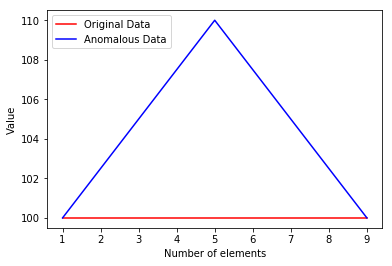

In [9]:
test_1 = plot_func(sample_data,'red','Original Data')
test_2 = plot_func(anomaly1_data,'blue','Anomalous Data') 

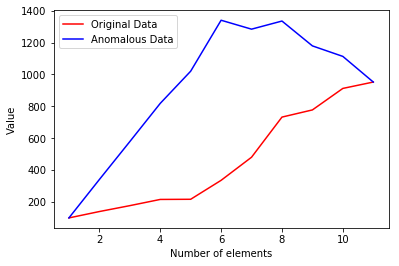

In [10]:
test3 = plot_func(sample_random_data,'red','Original Data')
test4 = plot_func(anomaly_data,'blue','Anomalous Data') 

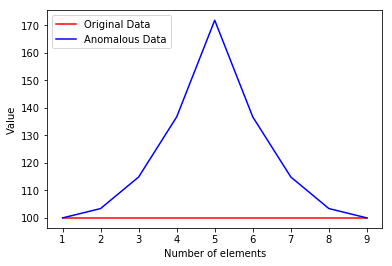

In [11]:
test5 = plot_func(sample_data,'red','Original Data')
test6 = plot_func(anomaly2_data,'blue','Anomalous Data') 

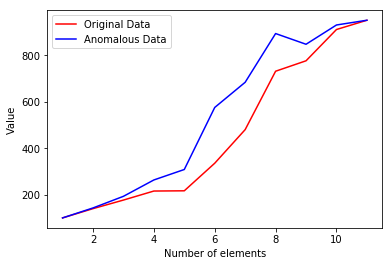

In [12]:
test7 = plot_func(sample_random_data,'red','Original Data')
test8 = plot_func(anomaly3_data,'blue','Anomalous Data') 

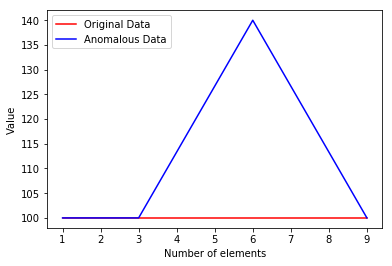

In [13]:
test9 = plot_func(sample_data,'red','Original Data')
test_10 = plot_func(anomaly4_data,'blue','Anomalous Data') 

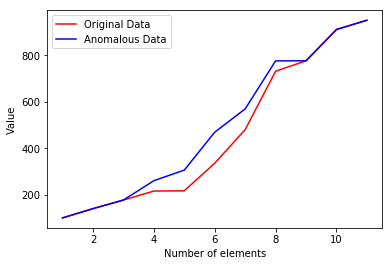

In [14]:
test_11 = plot_func(sample_random_data,'red','Original Data')
test_12 = plot_func(anomaly5_data,'blue','Anomalous Data') 

num = [10, 15, 20, 25, 30, 35, 40, 50, 60, 70]
t_num_test = make_zeroes(num)
num.sort()
mid_pos = 5
count = 3
delta = 1.0 + (float(50)/float(100))
new_list_test = [num[mid_pos]]

for j in range(0,count):
    new_list_test.append(num[mid_pos-j])
    new_list_test.append(num[mid_pos+j])
    new_list_test.sort()
        
mu = len(new_list_test)/2 
increment = new_list_test[mu] * delta

for k in range(mid_pos-count,mid_pos+count+1):
    if k == mid_pos:
        num[k] = increment
    else:
        increment_new = increment - new_list_test[mu]
        share = abs(mid_pos - k )
        num[k] = num[k] + increment_new * (1.0 - (float(share)/float(mu)))
        